<a href="https://colab.research.google.com/github/winnerthetechgenie/SVM-on-Iris-Dataset/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WORKING ON SUPPORT VECTOR CLASSIFIER ON THE IRIS DATASET

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


the iris dataset contains 4 rows with are attributes to determine which species the iris belong it. the final column contains 3 different species of the iris flowers


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [4]:
df.shape

(150, 6)

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

the next block of code shows there are 3 different species in the dataset

In [25]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

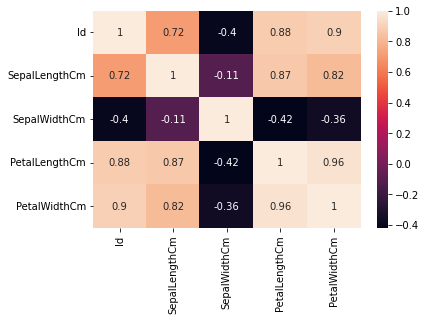

In [7]:
sns.heatmap(df.corr(), annot=True)

The ID has no effect on the flower specie so it is dropped

In [8]:
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df = df.drop('Id', axis=1)
target = df['Species']
s = set()
for specie in target:
  s.add(specie)
s = list(s)
rows = list(range(100, 150))
df = df.drop(df.index[rows])


one of the species will be removed to make the classification binary

here, We visualize the distribution of the two species on a plane taking the petal length and sepal length

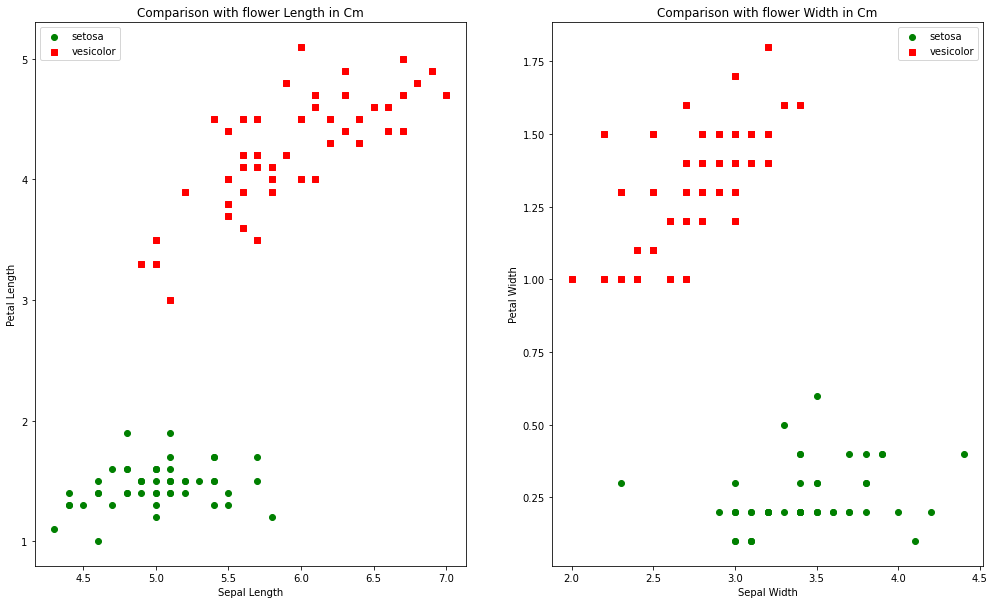

In [24]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']
x1 = df['SepalWidthCm']
y1 = df['PetalWidthCm']

#LENGTH VISUALIZATION
plt.figure(figsize = (17, 10))
plt.subplot(1, 2, 1)
setosa_x = x[:50]
setosa_y = y[:50]

vesicolor_x = x[50:]
vesicolor_y = y[50:]

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.scatter(setosa_x, setosa_y, marker='o', color='green', label='setosa')
plt.scatter(vesicolor_x, vesicolor_y, marker='s', color='red', label='vesicolor')
plt.title('Comparison with flower Length in Cm')
plt.legend()

#WIDTH VISUALIZATION
plt.subplot(1, 2, 2)
setosa_x1 = x1[:50]
setosa_y1 = y1[:50]

vesicolor_x1 = x1[50:]
vesicolor_y1 = y1[50:]

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.scatter(setosa_x1, setosa_y1, marker='o', color='green', label='setosa')
plt.scatter(vesicolor_x1, vesicolor_y1, marker='s', color='red', label='vesicolor')
plt.legend()
plt.title('Comparison with flower Width in Cm')
plt.show()

The visualization above shows that the Vesicolor Species have longer Sepal and Petal length compared to the Setosa Species

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import shuffle

In [ ]:
df = df.drop(columns=['SepalWidthCm',	'PetalWidthCm'])


In [ ]:
##Lets drop the columns we are not working with
#Here we create a list Y to encode the different species
target2 = df['Species']
Y = []
for specie in target2:
  if (specie == 'Iris-setosa'):
    Y.append(-1)
  else:
    Y.append(1)
df = df.drop('Species', axis=1)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(df, Y, train_size=0.9, random_state=30)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


Here we do the classification with SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

pred = clf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

1.0
[[4 0]
 [0 6]]


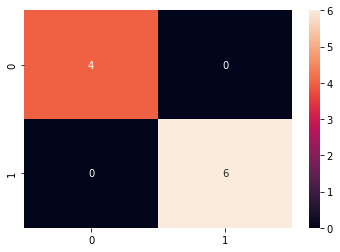

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)